# Explore here

In [11]:
import os
import shutil
import numpy as np
from keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt

In [12]:
def organize_images():
   
    train_dir = "../data/raw/train"
    cat_dir = os.path.join(train_dir, "cat")
    dog_dir = os.path.join(train_dir, "dog")

    # Creating directories if they don't exist
    os.makedirs(cat_dir, exist_ok=True)
    os.makedirs(dog_dir, exist_ok=True)

    for filename in os.listdir(train_dir):
        file_path = os.path.join(train_dir, filename)
        if os.path.isfile(file_path): 
            if filename.startswith("cat"):
                shutil.move(file_path, os.path.join(cat_dir, filename))
            elif filename.startswith("dog"):
                shutil.move(file_path, os.path.join(dog_dir, filename))

    print("Images organized successfully.")

if __name__ == "__main__":
    organize_images()

Images organized successfully.


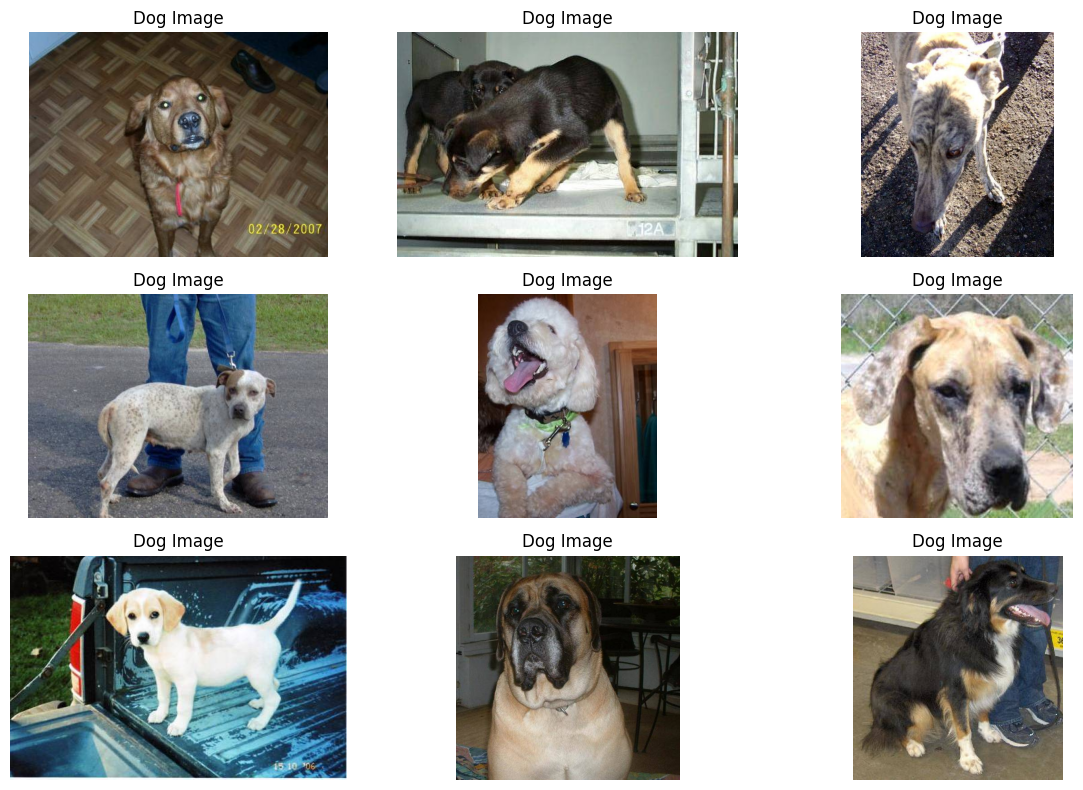

In [13]:
# Doggy

train_dir = "../data/raw/train"

dog_subfolder = os.path.join(train_dir, "dog")

dog_image_files = os.listdir(dog_subfolder)

dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path) 
    img_array = image.img_to_array(img)
    img_array /= 255.0 
    dog_images.append(img_array)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

plt.tight_layout()

plt.show()

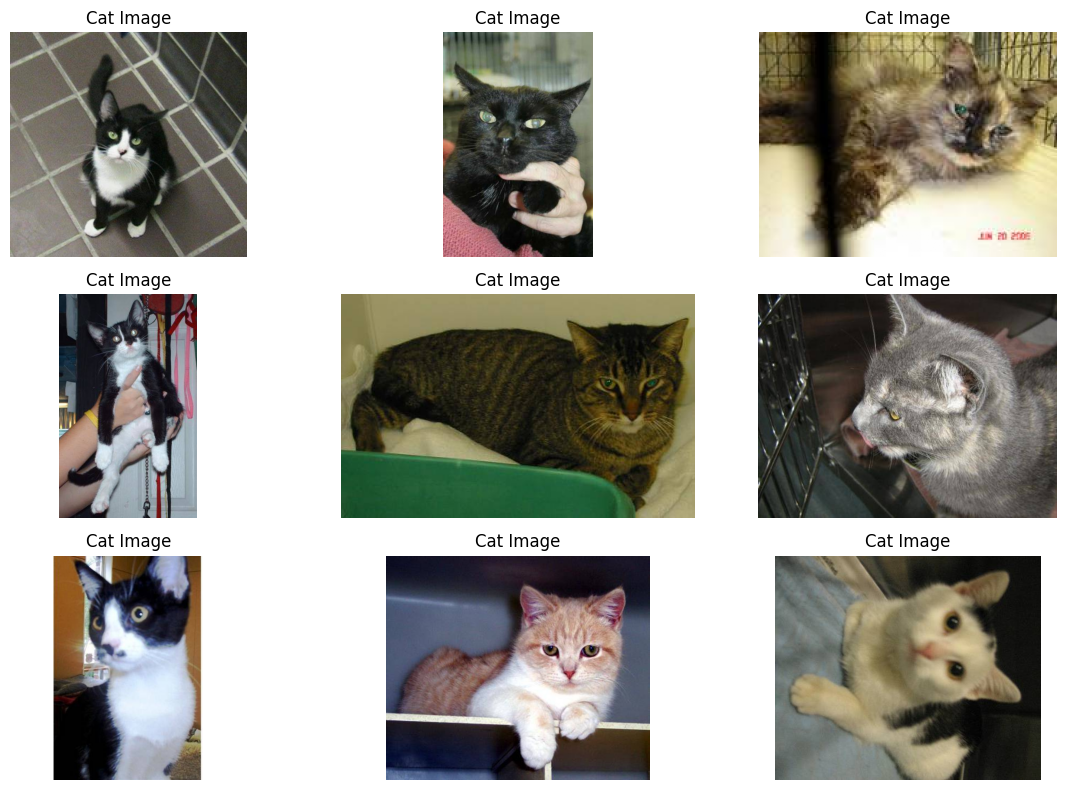

In [14]:
# Cat

data_dir = "../data/raw/train"

cat_subfolder = os.path.join(data_dir, "cat")

cat_image_files = os.listdir(cat_subfolder)

cat_images = []
for i in range(9):
    img_path = os.path.join(cat_subfolder, cat_image_files[i])
    img = image.load_img(img_path) 
    img_array = image.img_to_array(img)
    img_array /= 255.0 
    cat_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('Cat Image')
    plt.axis('off')

plt.tight_layout()

plt.show()

In [15]:
# Loading the dataset with train-test split
train_data = image_dataset_from_directory(
    "../data/raw/train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(200, 200),
    batch_size=32
)

validation_data = image_dataset_from_directory(
    "../data/raw/train",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(200, 200),
    batch_size=32
)

print("Training and validation data loaded successfully.")

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Training and validation data loaded successfully.


In [16]:
# Defining the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Adjust output for 2 classes

print("Model defined successfully.")

Model defined successfully.


2025-04-18 17:13:11.518095: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.
2025-04-18 17:13:11.571050: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.


In [17]:
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, verbose=1)

In [18]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
print("Model compiled successfully.")

Model compiled successfully.


In [19]:
model.save("final_model.keras")
print("Model saved successfully.")

Model saved successfully.
